# GRIP - The Spark Foundation

# Data Science & Business Analytics Intern


# Author : Ch.Kartikeya Srinivas

# Task 1: Prediction using Supervised ML

●Predict the percentage of an student based on the no. of study hours
● This is a simple linear regression task as it involves just 2 variables.
● You can use R, Python, SAS Enterprise Miner or any other tool
● Data can be found at http://bit.ly/w-data
● What will be predicted score if a student studies for 9.25 hrs/ day?

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn import model_selection
from sklearn import linear_model

In [7]:
df=pd.read_csv("http://bit.ly/w-data")
print("Data is coming correctly")
df

Data is coming correctly


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
df.shape

(25, 2)

In [9]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [13]:
df.groupby(['Hours'])['Scores'].mean()

Hours
1.1    17.0
1.5    20.0
1.9    24.0
2.5    25.5
2.7    27.5
3.2    27.0
3.3    42.0
3.5    30.0
3.8    35.0
4.5    41.0
4.8    54.0
5.1    47.0
5.5    60.0
5.9    62.0
6.1    67.0
6.9    76.0
7.4    69.0
7.7    85.0
7.8    86.0
8.3    81.0
8.5    75.0
8.9    95.0
9.2    88.0
Name: Scores, dtype: float64

# Exploring the dataset

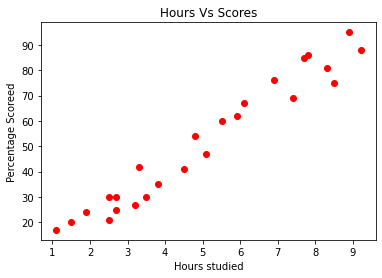

In [64]:
plt.scatter(df['Hours'], df['Scores'], color='Red',marker='o')
plt.title("Hours Vs Scores")
plt.xlabel("Hours studied")
plt.ylabel("Percentage Scoreed")
plt.show()

In [16]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Text(0.5, 1.0, 'Plotting the regression line')

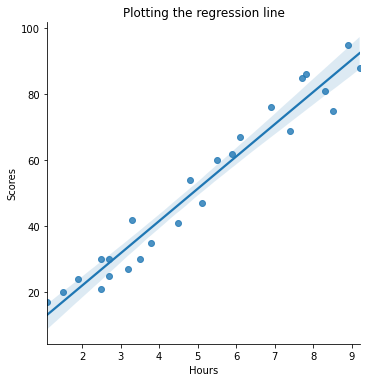

In [21]:
sns.lmplot(x="Hours",y="Scores", data=df)
plt.title("Plotting the regression line")
#sns.regplot(x="Hours", y="Scores", data=df)

From the graph above, we can see that there is a positive linear relationship between the number of hours studied and the scores obtained

# Dividing the data into attributes(inputs) and labels (outputs)

In [22]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [24]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [26]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# Splitting the dataset into the Training set and Test set


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# TRAINING THE MODEL


In [31]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

LinearRegression()

In [32]:
#REGRESSORS PREDICTION OVER THE RANGE OF DATA  USING LINSPACE()
pred=np.linspace(min(X),max(X)).reshape(-1,1)

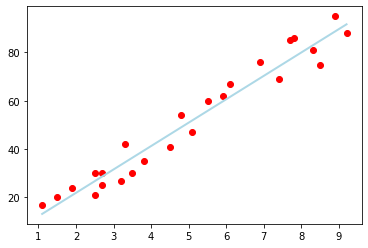

In [60]:
plt.scatter(X,y,color='red')
plt.plot(pred,reg.predict(pred),color='lightblue',linewidth=2)
plt.show()

In [37]:
#TO CHECK THE ACCURACY OF THE MODEL WE USE THE SCORE() METHOD 
acc=reg.score(X_test,y_test)
print("The accuracy of the Linear Regression Model is: ",acc)

The accuracy of the Linear Regression Model created above is:  0.955570080138813


# Prediction

In [38]:
y_pred=reg.predict(X_test)# Predicting the scores


In [39]:
print(y_pred)


[17.04289179 33.51695377 74.21757747 26.73351648 59.68164043 39.33132858
 20.91914167 78.09382734 69.37226512]


In [40]:
#COMPARING THE ACTUAL VS PREDICTED SCORES
p_df= pd.DataFrame({'ACTUAL SCORE':y_test,'PREDICTED SCORE':y_pred})
p_df

,ACTUAL SCORE,PREDICTED SCORE
0,20,17.042892
1,27,33.516954
2,69,74.217577
3,30,26.733516
4,62,59.681640
5,35,39.331329
6,24,20.919142
7,86,78.093827
8,76,69.372265


In [53]:
Hours = np.array([[7.25]])
predict=reg.predict(Hours)
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(predict[0]))

No of Hours = [[7.25]]
Predicted Score = 72.76398376398376


# Checking accuracy of our model


In [54]:
print("Train : ",reg.score(X_train,y_train)*100)
print("Test : ",reg.score(X_test,y_test)*100)

Train :  95.01107277744313
Test :  95.5570080138813


# Evaluating the model

In [55]:
from sklearn import metrics  
print('Mean Absolute Error:\t',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error:	 4.691397441397438


In [56]:
from sklearn.metrics import r2_score
print(' R^2 :\t',metrics.r2_score(y_test, y_pred))

 R^2 :	 0.955570080138813


In [57]:
from sklearn.metrics import mean_squared_error
print(' Mean Squared Error :\t',mean_squared_error(y_test, y_pred))
 

 Mean Squared Error :	 25.463280738222547
